# OnlineNewsPopularity Classification

https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [2]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [38]:
# read .csv from provided dataset
csv_filename="datasets/OnlineNewsPopularity.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename)

# handle goal attrubte to binary
popular = df.shares >= 1400
unpopular = df.shares < 1400
df.loc[popular,'shares'] = 1
df.loc[unpopular,'shares'] = 0

In [39]:
df.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...        731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2  http://mashable.com/2013/01/07/apple-40-billio...        731   
3  http://mashable.com/2013/01/07/astronaut-notre...        731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs   ...    \
0                  0.815385          4               2         1   ...     
1                  0.791946          3               1         1   ...     
2                  0.663866          3               1         1   ...     
3                  0.665635          9               0         1   ...     
4                  0.540890         19              19        20   ...     

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500       0  
1                      0.000000       0  
2                      0.000000       1  
3                      0.000000       0  
4                      0.136364       0  

[5 rows x 61 columns]

In [40]:
features=list(df.columns[2:60])

# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df[features], df['shares'], test_size=0.4, random_state=0)

In [41]:
print X_train.shape, y_train.shape

(23786, 58) (23786L,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

In [42]:
X = df[features]
y= df['shares']

Feature ranking:
1. feature 39 - LDA_02 (0.030305) 
2. feature 25 - kw_avg_avg (0.026984) 
3. feature 23 - kw_min_avg (0.026983) 
4. feature 38 - LDA_01 (0.023589) 
5. feature 37 - LDA_00 (0.023188) 
6. feature 24 - kw_max_avg (0.022944) 
7. feature 40 - LDA_03 (0.022731) 
8. feature 41 - LDA_04 (0.022693) 
9. feature 22 - kw_avg_max (0.022342) 
10. feature 5 - num_hrefs (0.021784) 
11. feature 0 - n_tokens_title (0.021752) 
12. feature 2 - n_unique_tokens (0.021663) 
13. feature 42 - global_subjectivity (0.021505) 
14. feature 4 - n_non_stop_unique_tokens (0.021418) 
15. feature 10 - num_keywords (0.021359) 
16. feature 26 - self_reference_min_shares (0.021290) 
17. feature 44 - global_rate_positive_words (0.021063) 
18. feature 9 - average_token_length (0.021005) 
19. feature 1 - n_tokens_content (0.020959) 
20. feature 19 - kw_avg_min (0.020918) 
21. feature 28 - self_reference_avg_sharess (0.020784) 
22. feature 18 - kw_max_min (0.020514) 
23. feature 7 - num_imgs (0.020303) 
24. f

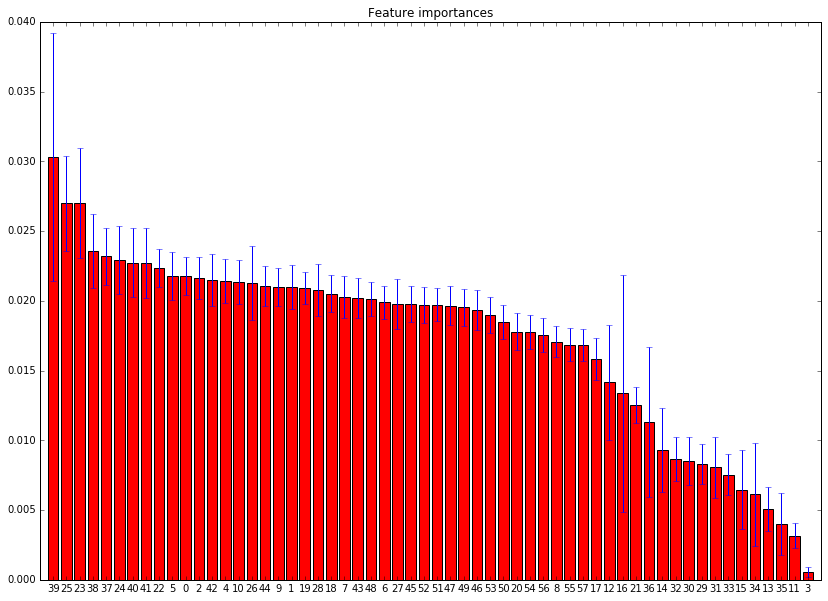

In [116]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X = df[features]
y = df['shares']
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [102]:
importances[indices[:5]]

array([ 0.03030539,  0.02698445,  0.0269827 ,  0.02358878,  0.02318772])

In [88]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 39 LDA_02 (0.030305)
2. feature 25 kw_avg_avg (0.026984)
3. feature 23 kw_min_avg (0.026983)
4. feature 38 LDA_01 (0.023589)
5. feature 37 LDA_00 (0.023188)


In [141]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

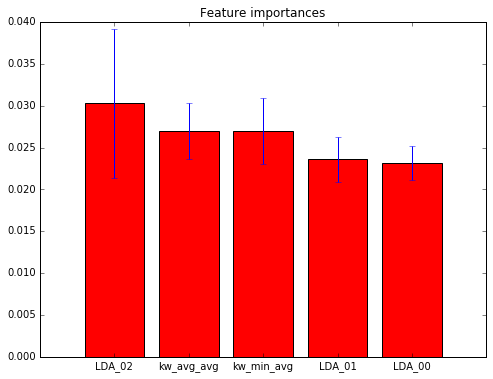

In [143]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [8]:
t0=time()
print "DecisionTree"

#dt = DecisionTreeClassifier(min_samples_split=1,random_state=99)
dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print "Acurracy: ", clf_dt.score(X_test,y_test)
t1=time()
print "time elapsed: ", t1-t0

DecisionTree
Acurracy:  0.638857359062
time elapsed:  0.859000205994


## cross validation for DT

In [9]:
tt0=time()
print "cross result========"
scores = cross_validation.cross_val_score(dt, df[features], df['shares'], cv=5)
print scores
print scores.mean()
tt1=time()
print "time elapsed: ", tt1-tt0
print "\n"

cross result========
[ 0.53272796  0.63463236  0.64749653  0.66048682  0.64984864]
0.625038462571
time elapsed:  6.19799995422




### Tuning our hyperparameters using GridSearch

In [146]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)

print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  4.5min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best score: 0.662
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 5
	clf__min_samples_split: 1
             precision    recall  f1-score   support

          0       0.62      0.59      0.60      7427
          1       0.65      0.68      0.67      8431

avg / total       0.64      0.64      0.64     15858



# Random Forest accuracy and time elapsed caculation

In [20]:
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print "Acurracy: ", clf_rf.score(X_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

RandomForest
Acurracy:  0.660865178459
time elapsed:  4.992000103


## cross validation for RF

In [21]:
tt2=time()
print "cross result========"
scores = cross_validation.cross_val_score(rf, df[features], df['shares'], cv=5)
print scores
print scores.mean()
tt3=time()
print "time elapsed: ", tt3-tt2
print "\n"


cross result========
[ 0.56514062  0.64711817  0.66136966  0.67524278  0.66826438]
0.64342712232
time elapsed:  37.5399999619




### Receiver Operating Characteristic (ROC) curve

In [22]:
roc_auc_score(y_test,rf.predict(X_test))

0.65715936063854308

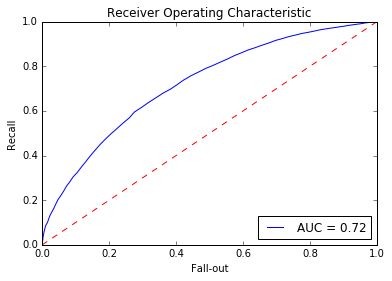

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions = rf.predict_proba(X_test)

false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

### Tuning Models using GridSearch

In [24]:

pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print classification_report(y_test, predictions)
    

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 38.3min finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best score: 0.671
Best parameters set:
	clf__max_depth: 25
	clf__min_samples_leaf: 2
	clf__min_samples_split: 10
	clf__n_estimators: 100
Accuracy: 0.661748013621
             precision    recall  f1-score   support

          0       0.65      0.59      0.62      7427
          1       0.67      0.73      0.70      8431

avg / total       0.66      0.66      0.66     15858



# Naive Bayes accuracy and time elapsed caculation


In [16]:
t4=time()
print "NaiveBayes"
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print "Acurracy: ", clf_nb.score(X_test,y_test)
t5=time()
print "time elapsed: ", t5-t4

NaiveBayes
Acurracy:  0.612120065582
time elapsed:  0.230999946594


## cross-validation for NB

In [17]:
tt4=time()
print "cross result========"
scores = cross_validation.cross_val_score(nb, df[features], df['shares'], cv=5)
print scores
print scores.mean()
tt5=time()
print "time elapsed: ", tt5-tt4
print "\n"

cross result========
[ 0.59389583  0.59831     0.61760626  0.62517341  0.60443996]
0.607885091183
time elapsed:  1.18400001526




# KNN accuracy and time elapsed caculation

In [8]:
t6=time()
print "KNN"
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, y_train)
print "Acurracy: ", clf_knn.score(X_test,y_test) 
t7=time()
print "time elapsed: ", t7-t6

KNN
Acurracy:  0.57012233573
time elapsed:  6.99800014496


## cross validation for KNN

In [9]:
tt6=time()
print "cross result========"
scores = cross_validation.cross_val_score(knn, df[features], df['shares'], cv=5)
print scores
print scores.mean()
tt7=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 0.53171901  0.52427797  0.56198764  0.56791525  0.56004036]
0.549188044908
time elapsed:  25.013999939




# SVM accuracy and time elapsed caculation

In [ ]:
t7=time()
print "SVM"

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print "Acurracy: ", clf_svc.score(X_test,y_test) 
t8=time()
print "time elapsed: ", t8-t7

## cross validation for SVM

In [ ]:
tt7=time()
print "cross result========"
scores = cross_validation.cross_val_score(svc, df[features], df['shares'], cv=5)
print scores
print scores.mean()
tt8=time()
print "time elapsed: ", tt7-tt6
print "\n"

In [ ]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

In [ ]:
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(y_test, predictions)

___
# Ensemble Learning

In [43]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

## Combining different algorithms for classification with majority vote

In [15]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001, 
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=5,
                              min_samples_split=1,
                              criterion='entropy', 
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1, 
                            p=2, 
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.70 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.68 (+/- 0.01) [Decision Tree]
ROC AUC: 0.57 (+/- 0.01) [KNN]


You may be wondering why we trained the logistic regression and k-nearest neighbors classifier as part of a pipeline. The reason behind it is that, both the
logistic regression and k-nearest neighbors algorithms (using the Euclidean distance metric) are not scale-invariant in contrast with decision trees.

Now let's move on to the more exciting part and combine the individual classifiers for majority rule voting in our MajorityVoteClassifier:

In [18]:
# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(
                classifiers=[pipe1, clf2])

clf_labels = ['Logistic Regression', 'Decision Tree', 'Majority Voting'] 
all_clf = [pipe1, clf2, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

ROC AUC: 0.70 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.68 (+/- 0.01) [Decision Tree]
ROC AUC: 0.71 (+/- 0.01) [Majority Voting]


## Evaluating and tuning the ensemble classifier

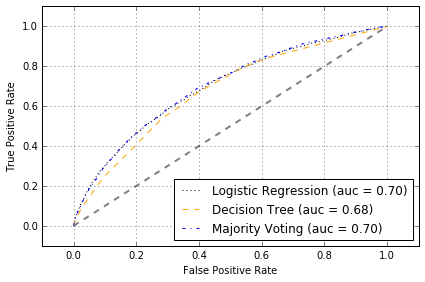

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, 
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, 
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, 
             color=clr, 
             linestyle=ls, 
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         color='gray', 
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [25]:
df.columns

Index([u'url', u'timedelta', u'n_tokens_title', u'n_tokens_content',
       u'n_unique_tokens', u'n_non_stop_words', u'n_non_stop_unique_tokens',
       u'num_hrefs', u'num_self_hrefs', u'num_imgs', u'num_videos',
       u'average_token_length', u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sen

In [32]:
X_2 = df[['LDA_02', 'kw_avg_avg']].values
y = df['shares'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y,test_size=0.40, random_state=1)

In [34]:
clf1 = LogisticRegression(penalty='l2', 
                          C=0.001, 
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=5,
                              min_samples_split=1,
                              criterion='entropy', 
                              random_state=0)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])

# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(
                classifiers=[pipe1, clf2])

clf_labels = ['Logistic Regression', 'Decision Tree', 'Majority Voting'] 

print('10-fold cross validation:\n')

all_clf = [pipe1, clf2, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.62 (+/- 0.02) [Logistic Regression]
ROC AUC: 0.62 (+/- 0.02) [Decision Tree]
ROC AUC: 0.63 (+/- 0.02) [Majority Voting]


We selected two best features for the classification examples, it would be interesting to see what the decision region of the ensemble classifier actually looks like:

In [35]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

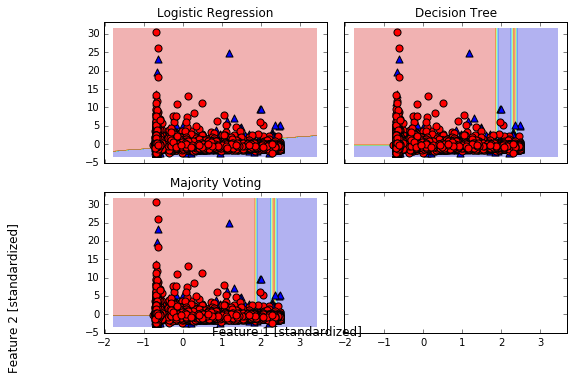

In [36]:
from itertools import product

all_clf = [pipe1, clf2, mv_clf]

x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=2, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(14, 9))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        all_clf, clf_labels):
    clf.fit(X_train_std, y_train)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0], 
                                  X_train_std[y_train==0, 1], 
                                  c='blue', 
                                  marker='^',
                                  s=50)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0], 
                                  X_train_std[y_train==1, 1], 
                                  c='red', 
                                  marker='o',
                                  s=50)
    
    axarr[idx[0], idx[1]].set_title(tt)

plt.text(-3.5, -4.5, 
         s='Feature 1 [standardized]', 
         ha='center', va='center', fontsize=12)
plt.text(-10.5, 4.5, 
         s='Feature 2 [standardized]', 
         ha='center', va='center', 
         fontsize=12, rotation=90)

plt.tight_layout()
# plt.savefig('./figures/voting_panel', bbox_inches='tight', dpi=300)
plt.show()

In [36]:
# read .csv from provided dataset
csv_filename="datasets/OnlineNewsPopularity.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename)

# handle goal attrubte to binary
popular = df.shares >= 1400
unpopular = df.shares < 1400
df.loc[popular,'shares'] = 1
df.loc[unpopular,'shares'] = 0

In [37]:
df.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...        731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2  http://mashable.com/2013/01/07/apple-40-billio...        731   
3  http://mashable.com/2013/01/07/astronaut-notre...        731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs   ...    \
0                  0.815385          4               2         1   ...     
1                  0.791946          3               1         1   ...     
2                  0.663866          3               1         1   ...     
3                  0.665635          9               0         1   ...     
4                  0.540890         19              19        20   ...     

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500       0  
1                      0.000000       0  
2                      0.000000       1  
3                      0.000000       0  
4                      0.136364       0  

[5 rows x 61 columns]

In [38]:
features=list(df.columns[2:60])

# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df[features], df['shares'], test_size=0.4, random_state=0)

In [39]:
print X_train.shape, y_train.shape

(23786, 58) (23786L,)


In [40]:
X = df[features]
y= df['shares']

In [49]:
clf1 = LogisticRegression(penalty='l2', 
                          C=0.001, 
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=5,
                              min_samples_split=1,
                              criterion='entropy', 
                              random_state=0)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])

# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(
                classifiers=[pipe1, clf2])

clf_labels = ['Logistic Regression', 'Decision Tree', 'Majority Voting'] 

print('10-fold cross validation:\n')

all_clf = [pipe1, clf2, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.70 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.68 (+/- 0.01) [Decision Tree]
ROC AUC: 0.71 (+/- 0.01) [Majority Voting]


In [50]:
mv_clf.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
             min_samples_split=1, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 1,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__presort': False,
 'decisiontreeclassifier__random_state': 0,
 'decisiontreeclassifier__splitter': 'best',
 'pipeline': Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=Tr

### Tuning using GridSearch:

In [52]:
from sklearn.grid_search import GridSearchCV

params = {'decisiontreeclassifier__max_depth': [1, 2],
          'pipeline__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf, 
                    param_grid=params, 
                    cv=10, 
                    scoring='roc_auc')
grid.fit(X_train, y_train)

for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f+/-%0.2f %r"
            % (mean_score, scores.std() / 2, params))

0.697+/-0.01 {'decisiontreeclassifier__max_depth': 1, 'pipeline__clf__C': 0.001}
0.702+/-0.01 {'decisiontreeclassifier__max_depth': 1, 'pipeline__clf__C': 0.1}
0.702+/-0.01 {'decisiontreeclassifier__max_depth': 1, 'pipeline__clf__C': 100.0}
0.698+/-0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline__clf__C': 0.001}
0.702+/-0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline__clf__C': 0.1}
0.702+/-0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline__clf__C': 100.0}


In [53]:
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

Best parameters: {'decisiontreeclassifier__max_depth': 1, 'pipeline__clf__C': 0.1}
Accuracy: 0.70


## Bagging -- Building an ensemble of classifiers from bootstrap samples

Bagging is an ensemble learning technique that is closely related to the MajorityVoteClassifier,however, instead of using the same training set to fit the individual classifiers in the ensemble, we draw bootstrap samples (random samples with replacement) from the initial training set, which is why bagging is also known as bootstrap aggregating.

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=-1, 
                        random_state=1)

In [9]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.572
Bagging train/test accuracies 1.000/0.661


C:\Miniconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Miniconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Miniconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Miniconda2\lib\site-packages

## Leveraging weak learners via adaptive boosting 

In [10]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0)

In [11]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.596/0.597
AdaBoost train/test accuracies 0.675/0.662


# PCA Decomposition

In [19]:
target_names = ['Shares > 1400' , 'Shares < 1400']

In [41]:
X.values

array([[  1.20000000e+01,   2.19000000e+02,   6.63594467e-01, ...,
         -1.87500000e-01,   0.00000000e+00,   1.87500000e-01],
       [  9.00000000e+00,   2.55000000e+02,   6.04743081e-01, ...,
          0.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       [  9.00000000e+00,   2.11000000e+02,   5.75129531e-01, ...,
          0.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       ..., 
       [  1.00000000e+01,   4.42000000e+02,   5.16355139e-01, ...,
          1.36363636e-01,   4.54545450e-02,   1.36363636e-01],
       [  6.00000000e+00,   6.82000000e+02,   5.39493293e-01, ...,
          0.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       [  1.00000000e+01,   1.57000000e+02,   7.01986750e-01, ...,
          2.50000000e-01,   1.66666667e-01,   2.50000000e-01]])

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

In [48]:
for a in [red_x, red_y,blue_x,blue_y]:
    print len(a)

18490
18490
21154
21154


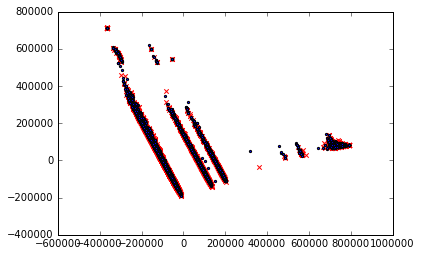

In [49]:
red_x, red_y = [], []
blue_x, blue_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
        
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='.')
plt.show()

C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:40: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


explained variance ratio (first two components): [ 0.7628241   0.16383047]


C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


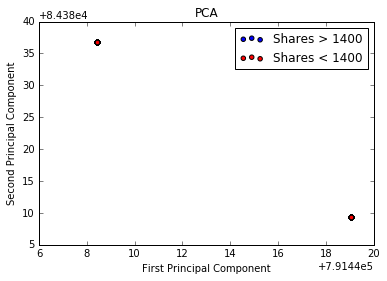

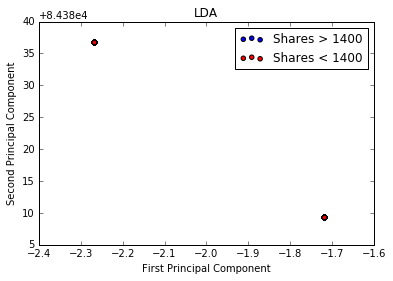

'\n\nfor c, i, target_name in zip("rb", [0, 1], target_names):\n    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)\nplt.legend()\nplt.title(\'PCA\')\n\nplt.figure()\nfor c, i, target_name in zip("rb", [0, 1], target_names):\n    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)\nplt.legend()\nplt.title(\'LDA\')\n\nplt.show()\n'

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
"""
pca = PCA(n_components=2)
X_r = pca.fit(X.values).transform(X.values)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X.values, y.values).transform(X.values)
"""
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


plt.figure()

colors = ['blue','red']
for i in xrange(len(colors)):
    px = X_r[:, 0][y == i]
    py = X_r[:, 1][y == i]
    plt.scatter(px, py, c=colors[i])
plt.legend(target_names)
plt.title('PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.figure()

colors = ['blue','red']
for i in xrange(len(colors)):
    px = X_r2[:, 0][y == i]
    py = X_pca[:, 1][y == i]
    plt.scatter(px, py, c=colors[i])
plt.legend(target_names)
plt.title('LDA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

"""

for c, i, target_name in zip("rb", [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA')

plt.figure()
for c, i, target_name in zip("rb", [0, 1], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA')

plt.show()
"""

In [25]:
plt.figure()
def plot_pca_scatter():
    colors = ['blue','red']
    for i in xrange(len(colors)):
        px = X_pca[:, 0][y == i]
        py = X_pca[:, 1][y == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

In [26]:
from sklearn.decomposition import PCA


estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X.values)
plot_pca_scatter() # Note that we only plot the first and second principal component

C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [ ]:
plt.figure(figsize=(2. * n_col, 2.26 * n_row))
for i, comp in enumerate(images):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
    plt.text(0, -1, str(i + 1) + '-component')
    plt.xticks(())
    plt.yticks(())

___
# Regression

In [3]:
# read .csv from provided dataset
csv_filename="datasets/OnlineNewsPopularity.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename)

In [8]:
df.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...        731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2  http://mashable.com/2013/01/07/apple-40-billio...        731   
3  http://mashable.com/2013/01/07/astronaut-notre...        731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs   ...    \
0                  0.815385          4               2         1   ...     
1                  0.791946          3               1         1   ...     
2                  0.663866          3               1         1   ...     
3                  0.665635          9               0         1   ...     
4                  0.540890         19              19        20   ...     

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 61 columns]

In [40]:
features = df.columns[2:-1]

In [41]:
X = df[features]

In [42]:
y = df['shares']

In [43]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.4, random_state=0)

In [44]:
print X_train.shape, y_train.shape

(23786, 58) (23786L,)


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split
from sklearn. cross_validation import cross_val_score

from sklearn.feature_selection import *
from sklearn import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [45]:
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

C:\Miniconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

In [46]:
X.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length              ...               \
count  39644.000000          39644.000000              ...                
mean       1.249874              4.548239              ...                
std        4.107855              0.844406              ...                
min        0.000000              0.000000              ...                
25%        0.000000              4.478404              ...                
50%        0.000000              4.664082              ...                
75%        1.000000              4.854839              ...                
max       91.000000              8.041534              ...                

       avg_positive_polarity  min_positive_polarity  max_positive_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.353825               0.095446               0.756728   
std                 0.104542               0.071315               0.247786   
min                 0.000000               0.000000               0.000000   
25%                 0.306244               0.050000               0.600000   
50%                 0.358755               0.100000               0.800000   
75%                 0.411428               0.100000               1.000000   
max                 1.000000               1.000000               1.000000   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean               -0.259524              -0.521944              -0.107500   
std                 0.127726               0.290290               0.095373   
min                -1.000000              -1.000000              -1.000000   
25%                -0.328383              -0.700000              -0.125000   
50%                -0.253333              -0.500000              -0.100000   
75%                -0.186905              -0.300000              -0.050000   
max                 0.000000               0.000000               0.000000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
count        39644.000000              39644.000000            39644.000000   
mean             0.282353                  0.071425                0.341843   
std              0.324247                  0.265450                0.188791   
min              0.000000                 -1.000000                0.000000   
25%              0.000000                  0.000000                0.166667   
50%              0.150000           

In [47]:
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

C:\Miniconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

### Select K Best Features

[(False, 'n_tokens_title'), (False, 'n_tokens_content'), (False, 'n_unique_tokens'), (False, 'n_non_stop_words'), (False, 'n_non_stop_unique_tokens'), (False, 'num_hrefs'), (False, 'num_self_hrefs'), (False, 'num_imgs'), (False, 'num_videos'), (False, 'average_token_length'), (False, 'num_keywords'), (False, 'data_channel_is_lifestyle'), (False, 'data_channel_is_entertainment'), (False, 'data_channel_is_bus'), (False, 'data_channel_is_socmed'), (False, 'data_channel_is_tech'), (False, 'data_channel_is_world'), (False, 'kw_min_min'), (False, 'kw_max_min'), (False, 'kw_avg_min'), (False, 'kw_min_max'), (False, 'kw_max_max'), (False, 'kw_avg_max'), (False, 'kw_min_avg'), (True, 'kw_max_avg'), (True, 'kw_avg_avg'), (True, 'self_reference_min_shares'), (False, 'self_reference_max_shares'), (True, 'self_reference_avg_sharess'), (False, 'weekday_is_monday'), (False, 'weekday_is_tuesday'), (False, 'weekday_is_wednesday'), (False, 'weekday_is_thursday'), (False, 'weekday_is_friday'), (False, 'w

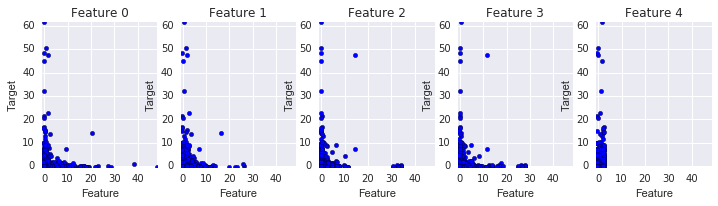

In [49]:
%matplotlib inline
from sklearn.feature_selection import *

fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,y_train)
features_zip = zip(fs.get_support(),features)
print features_zip

x_min, x_max = X_new[:,0].min(), X_new[:, 0].max()
y_min, y_max = y_train.min(), y_train.max()

fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)

fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature ' + str(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Target')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],y_train)

In [50]:
best_features = []
for boolean,feature in features_zip:
    if boolean:
        best_features.append(feature)
best_features

['kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_avg_sharess',
 'LDA_03']

### Scatter Plot

In [56]:
# Scaling the features using StandardScaler:
df_scaler = StandardScaler()
df[df.columns[2:]] = df_scaler.fit_transform(df[df.columns[2:]])

In [58]:
cols = best_features + ['shares']

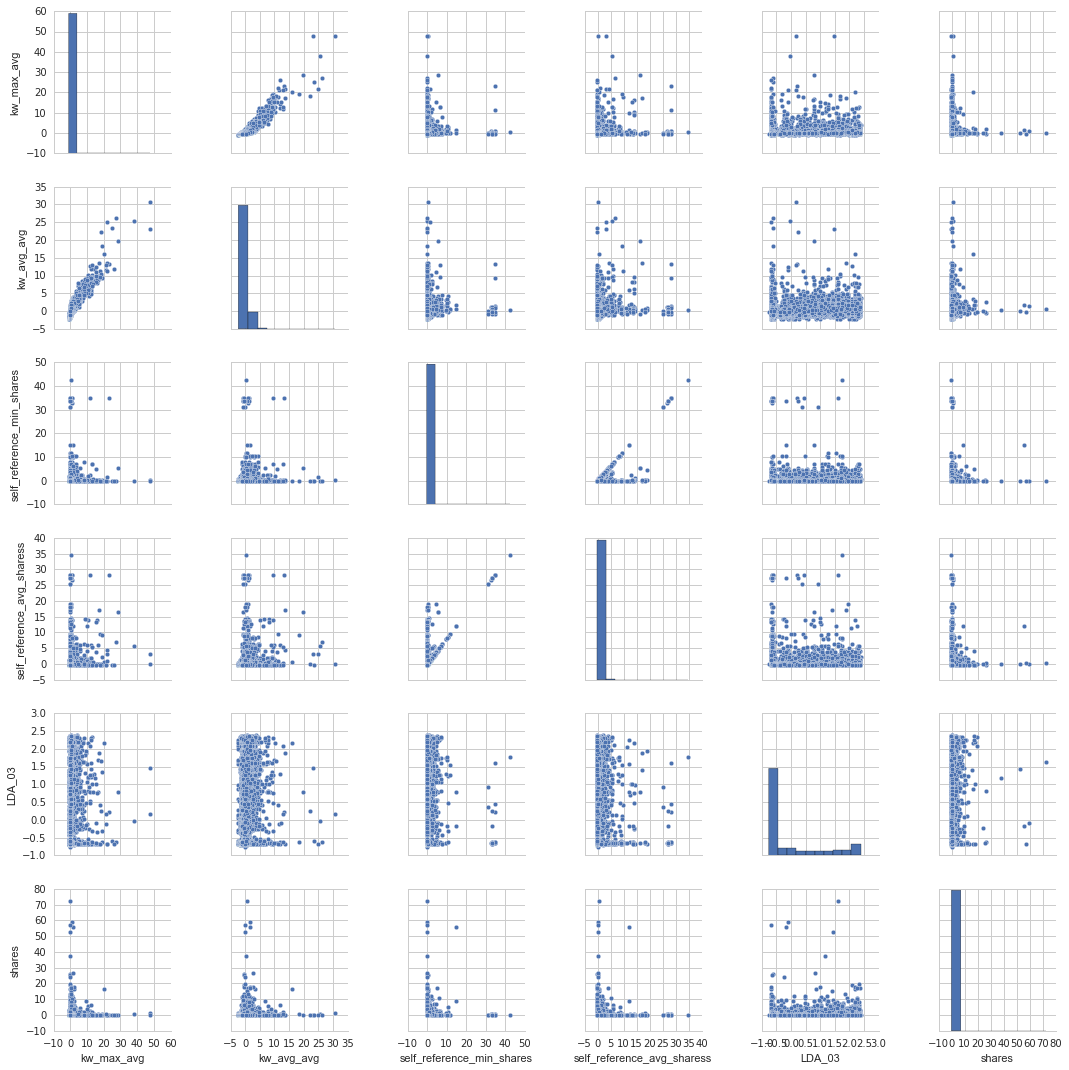

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

sns.pairplot(df[cols], size=2.5);
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

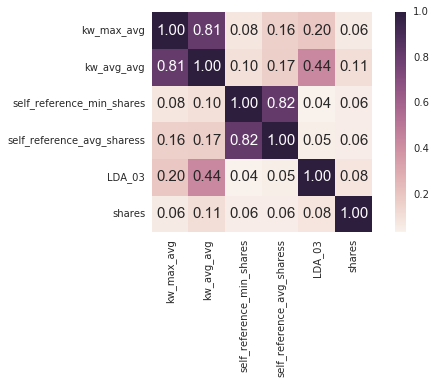

In [60]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

In [4]:
# read .csv from provided dataset
csv_filename="datasets/OnlineNewsPopularity.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename)

In [5]:
features = df.columns[2:-1]

In [6]:
X = df[features]

In [7]:
y = df['shares']

In [8]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.4, random_state=0)

In [9]:
print X_train.shape, y_train.shape

(23786, 58) (23786L,)


### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [82]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 181358894.790, test: 1700598803470048768.000
R^2 train: 0.022, test: -28472172959.919


### Lasso Regression

In [83]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[  9.67891406e+01   4.44296065e-01   3.61892515e+03  -8.22074573e+02
  -2.13772910e+03   2.34614607e+01  -5.18091998e+01   1.76466228e+01
   5.57852453e+00  -2.71608071e+02   7.14479455e+01  -1.39340731e+03
  -1.21173084e+03  -7.23420147e+02  -7.28608253e+02  -4.67738423e+02
  -7.99261632e+02   6.52240623e-01   2.78920439e-02   7.25245368e-01
  -2.36302809e-03  -1.04966796e-03   7.49848442e-06  -3.94333058e-01
  -2.44257197e-01   1.79666394e+00   4.11541926e-02   1.22546275e-02
  -2.07448347e-02   5.07029841e+02  -2.51206149e+02   7.48146283e+01
  -1.49980732e+02  -1.43919882e+02   5.01553376e+02  -0.00000000e+00
   4.80469793e+01   4.32392378e+02  -4.06308185e+02  -3.67412375e+02
   1.75204540e+02   0.00000000e+00   2.35865194e+03   1.65504781e+03
  -1.20914269e+04  -0.00000000e+00   0.00000000e+00   4.97650996e+02
  -3.32887938e+03  -1.24619263e+03   9.75857923e+02  -3.33625671e+03
   3.64943996e+02   3.68421922e+02  -1.99245537e+02  -8.93416892e+01
   5.44375600e+02   7.76848258e+02

In [84]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 181370062.339, test: 63977156.347
R^2 train: 0.022, test: -0.071


### Ridge regression

In [85]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[  9.73780586e+01   4.36544041e-01   3.49767737e+03  -1.49095688e+03
  -2.09082044e+03   2.37385133e+01  -5.20368662e+01   1.79212725e+01
   5.46130005e+00  -2.63157321e+02   7.09297312e+01  -1.40152716e+03
  -1.21196532e+03  -7.33679234e+02  -7.40750541e+02  -4.76721716e+02
  -8.00890156e+02   6.52819778e-01   2.78331400e-02   7.26658098e-01
  -2.36437330e-03  -1.04545866e-03   1.87826872e-05  -3.94501091e-01
  -2.43959781e-01   1.79437610e+00   4.11399968e-02   1.22455219e-02
  -2.06835372e-02   4.66297844e+02  -2.92834134e+02   3.38102437e+01
  -1.92373785e+02  -1.85658399e+02   3.37377723e+02  -1.66619493e+02
   1.70758230e+02   4.66763992e+02  -3.80509091e+02  -3.33639407e+02
   2.09296596e+02   3.80895428e+01   2.32905358e+03   1.39443932e+03
  -8.98867160e+03  -2.26401492e+03   5.56178006e+02   1.23650877e+03
  -3.16685456e+03  -1.21822479e+03   9.42136172e+02  -3.28740542e+03
   3.88834787e+02   3.37844161e+02  -2.07567356e+02  -9.24476601e+01
   5.62462449e+02   7.83841704e+02

In [86]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 181371135.654, test: 72440966.201
R^2 train: 0.022, test: -0.213


### ElasticNet Regression

In [87]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)
y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)
print(en.coef_)

[  7.33512666e+01   1.00865369e-01   1.85158201e-01  -9.58449799e+00
  -5.32287574e+00   3.00888804e+01  -4.28551721e+01   2.39598822e+01
   1.36469984e+01  -7.38064413e+01   8.44718841e+01  -5.95017569e+01
  -1.22345185e+02   1.64706321e+01   4.00714327e+00   5.74803075e+01
  -5.11154938e+01   8.73854947e-01   3.55357505e-02   6.83701509e-01
  -3.37738353e-03  -1.76445422e-03   1.56896288e-03  -4.83283418e-01
  -2.83216448e-01   2.09516907e+00   4.03846896e-02   1.10775596e-02
  -1.80477778e-02   1.11834657e+02  -7.64575273e+01   9.65874864e+00
  -5.32590449e+01  -3.72703669e+01   5.08410276e+01  -4.34749398e+00
   4.54935336e+01   2.38322141e+01  -4.63696731e+01  -4.88336520e+01
   6.31670896e+01   7.20402153e+00   3.21342258e+01  -1.09957900e+01
  -0.00000000e+00   0.00000000e+00  -1.33792358e+01   3.21075087e+00
  -8.68868477e+00  -1.06026257e+01   1.94126463e+01  -6.37015374e+01
  -7.60727219e+01  -3.29749944e+01   2.01857708e+01  -6.48900916e+00
   2.65515288e+01   4.16349025e+01

In [88]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 181740602.016, test: 58873606.287
R^2 train: 0.020, test: 0.014


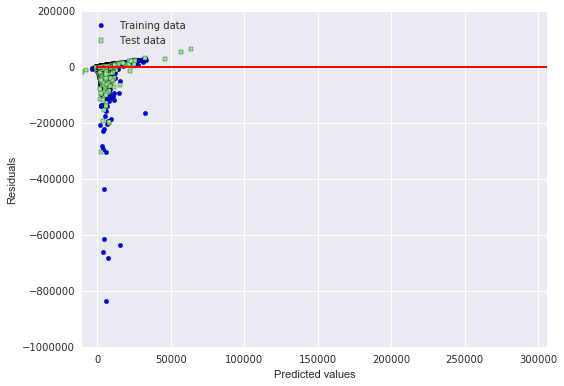

In [90]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train.min(),y_test.min()), xmax=max(y_train.max(), y_test.max()), lw=2, color='red')
plt.xlim([min(y_test_pred.min(),y_test.min()), max(y_test_pred.max(), y_test.max())])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

## Decision tree regression

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 161962918.240, test: 61245914.862
R^2 train: 0.127, test: -0.025


## Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))